<a href="https://colab.research.google.com/github/Alton01/VGG_Pytorch_Project_Food_Classification/blob/main/VGG_Arch_food_project_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# VGG Computer vision with PyTorch

# 4 different classes of food.
# Sushi
# Cup Cakes
# Macarons
# Chocolate cake

In [2]:

import torch
from torch import nn


In [4]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [5]:
# FOR GETTING DATA

import requests # for making requests over internet
import zipfile # for unzipping zipped files
from pathlib import Path
import os


# set up data path

data_path = Path("data/")
image_path = data_path / "food_images"

# if image folder doesn't exist, download it and prepare it...

if image_path.is_dir():
  print(f"{image_path} directory already exists. Skipping download...")
else:
  print(f"Image path - {image_path} does not exist. Creating one.....")
  image_path.mkdir(parents=True, exist_ok=True)

# Download the data zip file and  writing it to data path
with open(data_path / "food_images.zip", "wb") as f:
  request = requests.get("https://programmingoceanacademy.s3.ap-southeast-1.amazonaws.com/image_classification_dataset.zip")
  print(f"Downloading the food images data....")
  f.write(request.content)

# Unzip the data
with zipfile.ZipFile(data_path / "food_images.zip", "r") as zip_ref:
  print(f"Unzipping the food images data....")
  zip_ref.extractall(image_path)

Image path - data/food_images does not exist. Creating one.....
Unzipping the food images data....


In [6]:
# Remove the zip folder
os.remove("/content/data/food_images.zip")

In [7]:
# our dataset is in Standard Image Classification Format
# data -> food_images -> dataset -> train -> chocolate_cake, cup_cake -> macarons -> sushi
# data -> food_images -> dataset -> test -> chocolate_cake, cup_cake -> macarons -> sushi



In [8]:
# Setup Directory Paths

train_dir = image_path / "dataset/train"
test_dir = image_path / "dataset/test"

train_dir, test_dir

(PosixPath('data/food_images/dataset/train'),
 PosixPath('data/food_images/dataset/test'))

In [9]:
# Data preparation and exploration

import os

def walk_through_dir(dir_path):
  # for walking through directory path
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 1 directories and 0 images in 'data/food_images'.
There are 2 directories and 0 images in 'data/food_images/dataset'.
There are 4 directories and 0 images in 'data/food_images/dataset/test'.
There are 0 directories and 75 images in 'data/food_images/dataset/test/sushi'.
There are 0 directories and 75 images in 'data/food_images/dataset/test/macarons'.
There are 0 directories and 75 images in 'data/food_images/dataset/test/cup_cakes'.
There are 0 directories and 75 images in 'data/food_images/dataset/test/chocolate_cake'.
There are 4 directories and 0 images in 'data/food_images/dataset/train'.
There are 0 directories and 250 images in 'data/food_images/dataset/train/sushi'.
There are 0 directories and 250 images in 'data/food_images/dataset/train/macarons'.
There are 0 directories and 250 images in 'data/food_images/dataset/train/cup_cakes'.
There are 0 directories and 250 images in 'data/food_images/dataset/train/chocolate_cake'.


In [10]:
train_dir

PosixPath('data/food_images/dataset/train')

In [11]:
test_dir

PosixPath('data/food_images/dataset/test')

Random Image Path: data/food_images/dataset/train/macarons/908414.jpg
Image class: macarons
Image height: 385
Image width: 512


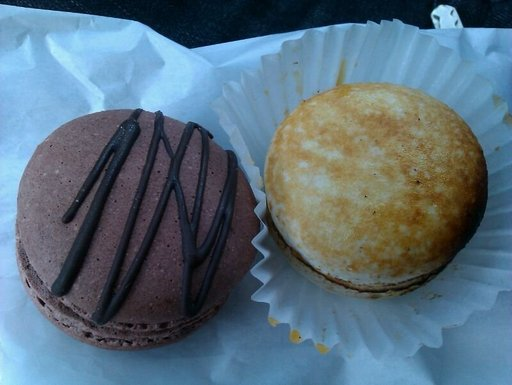

In [16]:
#data visualization
# Get images
# PIL is a library in python. Python Image Library

import random
from PIL import Image

# Get all image paths
image_path_list = list(image_path.glob("*/*/*/*.jpg"))

# Pick a random image path
random_image_path = random.choice(image_path_list)

# Get image class from path ( image class isthe name of the directory where the image is stored)
# (like sushi, macarons, cup_cake)
image_class = random_image_path.parent.stem

# Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random Image Path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(384.5), np.float64(-0.5))

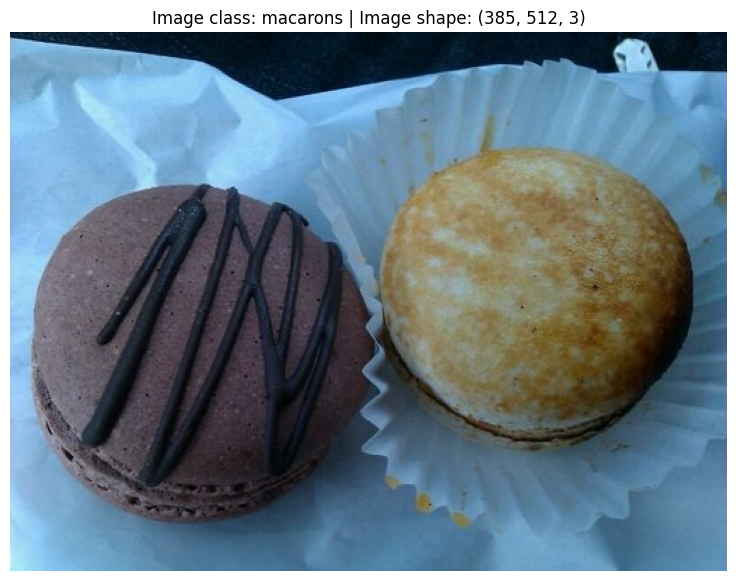

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Turn image into an array
# convert image from PIL into numpy array

img_as_array = np.asarray(img)

#Plot the image with matplotlib

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)


In [ ]:
img_as_array

In [19]:
# Data TRANSFORMATION per image
# Turn target data into tensors (numerical representation of images)

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [21]:
## Transforming Data With Torchvision.transforms

data_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5), # Flip images 50% of the time
    transforms.ToTensor()
])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

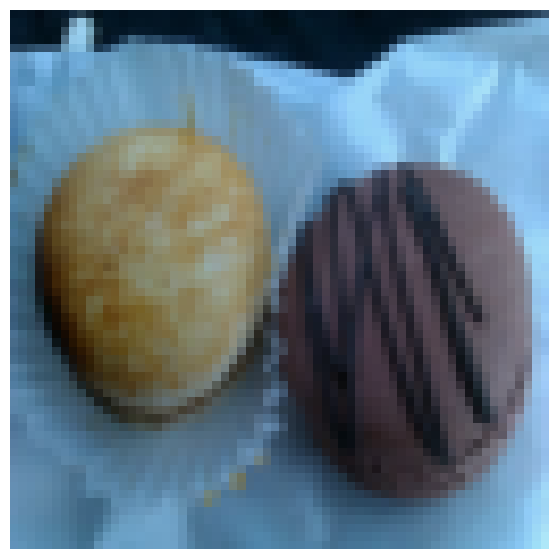

In [24]:
plt.figure(figsize=(10,7))
plt.imshow(data_transform(img).permute(1,2,0))
plt.axis(False)

In [23]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [25]:
data_transform(img)

tensor([[[0.0118, 0.0157, 0.0118,  ..., 0.1059, 0.1490, 0.2039],
         [0.0196, 0.0157, 0.0118,  ..., 0.4431, 0.4863, 0.5059],
         [0.0235, 0.0275, 0.0157,  ..., 0.4902, 0.4863, 0.5020],
         ...,
         [0.3647, 0.3569, 0.3529,  ..., 0.5647, 0.6157, 0.6627],
         [0.3725, 0.3608, 0.3569,  ..., 0.5686, 0.6196, 0.6784],
         [0.3804, 0.3725, 0.3529,  ..., 0.5765, 0.6196, 0.6784]],

        [[0.0784, 0.0824, 0.0706,  ..., 0.2039, 0.2588, 0.3255],
         [0.0980, 0.0941, 0.0745,  ..., 0.6392, 0.6941, 0.7176],
         [0.0980, 0.1020, 0.0784,  ..., 0.6980, 0.7059, 0.7137],
         ...,
         [0.5647, 0.5529, 0.5373,  ..., 0.8000, 0.8471, 0.8784],
         [0.5686, 0.5569, 0.5490,  ..., 0.8118, 0.8588, 0.9020],
         [0.5725, 0.5765, 0.5569,  ..., 0.8235, 0.8706, 0.9059]],

        [[0.1373, 0.1412, 0.1216,  ..., 0.2941, 0.3569, 0.4314],
         [0.1608, 0.1569, 0.1255,  ..., 0.7843, 0.8431, 0.8706],
         [0.1647, 0.1647, 0.1294,  ..., 0.8431, 0.8431, 0.

In [27]:
## Function to show the difference between the original and transformed image from a path for 3 images

def plot_transformed_images(image_paths: list, transform, n=3, seed=None):

  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths, k=n) # states number of images to sample.

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot image
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


In [ ]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=None)

In [29]:
# Loading image data using image folder
# Use imagefolder class to create datasets
# Apply transformation to whole datasets

from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                    transform=data_transform,
                                    target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                    transform=data_transform,
                                    target_transform=None)

In [30]:
train_data

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: data/food_images/dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [31]:
test_data

Dataset ImageFolder
    Number of datapoints: 300
    Root location: data/food_images/dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [32]:
train_data[0]

(tensor([[[0.1961, 0.4510, 0.9020,  ..., 0.9647, 0.9647, 0.9647],
          [0.3176, 0.7569, 0.9608,  ..., 0.9647, 0.9647, 0.9647],
          [0.6471, 0.9412, 0.9686,  ..., 0.9647, 0.9647, 0.9647],
          ...,
          [0.1098, 0.1137, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
          [0.1059, 0.1059, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
          [0.0980, 0.1020, 0.1176,  ..., 0.9647, 0.9647, 0.9647]],
 
         [[0.1961, 0.4627, 0.9020,  ..., 1.0000, 1.0000, 1.0000],
          [0.3216, 0.7647, 0.9647,  ..., 1.0000, 1.0000, 1.0000],
          [0.6471, 0.9451, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.1020, 0.1137, 0.1176,  ..., 1.0000, 1.0000, 1.0000],
          [0.1020, 0.1020, 0.1137,  ..., 1.0000, 1.0000, 1.0000],
          [0.0941, 0.0980, 0.1176,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.2314, 0.4824, 0.8863,  ..., 0.9882, 0.9882, 0.9882],
          [0.3412, 0.7490, 0.9255,  ..., 0.9882, 0.9882, 0.9882],
          [0.6510, 0.9098, 0.9216,  ...,

In [33]:
# Get class names as list

class_names = train_data.classes
class_names

['chocolate_cake', 'cup_cakes', 'macarons', 'sushi']

In [34]:
# Get class names as dict
# class_to_idx : this attributes will give us a dictionary of the classes mapped to indexes

class_dict = train_data.class_to_idx
class_dict

{'chocolate_cake': 0, 'cup_cakes': 1, 'macarons': 2, 'sushi': 3}

In [36]:
# Check the length of our datasets
len(train_data), len(test_data)

(1000, 300)

In [39]:
# Get a sample image and label from the training data
image, label = train_data[0]

print(f"Image tensor:\n {image}")
print(f"Image shape: {image.shape}")
print(f"Image datatype: {image.dtype}")
print(f"Image label: {label}")
print(f"Label Datatype: {type(label)}")

Image tensor:
 tensor([[[0.1961, 0.4510, 0.9020,  ..., 0.9647, 0.9647, 0.9647],
         [0.3176, 0.7569, 0.9608,  ..., 0.9647, 0.9647, 0.9647],
         [0.6471, 0.9412, 0.9686,  ..., 0.9647, 0.9647, 0.9647],
         ...,
         [0.1098, 0.1137, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
         [0.1059, 0.1059, 0.1098,  ..., 0.9647, 0.9647, 0.9647],
         [0.0980, 0.1020, 0.1176,  ..., 0.9647, 0.9647, 0.9647]],

        [[0.1961, 0.4627, 0.9020,  ..., 1.0000, 1.0000, 1.0000],
         [0.3216, 0.7647, 0.9647,  ..., 1.0000, 1.0000, 1.0000],
         [0.6471, 0.9451, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.1020, 0.1137, 0.1176,  ..., 1.0000, 1.0000, 1.0000],
         [0.1020, 0.1020, 0.1137,  ..., 1.0000, 1.0000, 1.0000],
         [0.0941, 0.0980, 0.1176,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.2314, 0.4824, 0.8863,  ..., 0.9882, 0.9882, 0.9882],
         [0.3412, 0.7490, 0.9255,  ..., 0.9882, 0.9882, 0.9882],
         [0.6510, 0.9098, 0.9216,  ..., 0.9

In [41]:
class_names[label]

'chocolate_cake'

Original image shape: torch.Size([3, 64, 64]) -> [C, H, W]
Image permuted shape: torch.Size([64, 64, 3]) -> [H, W, C]


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

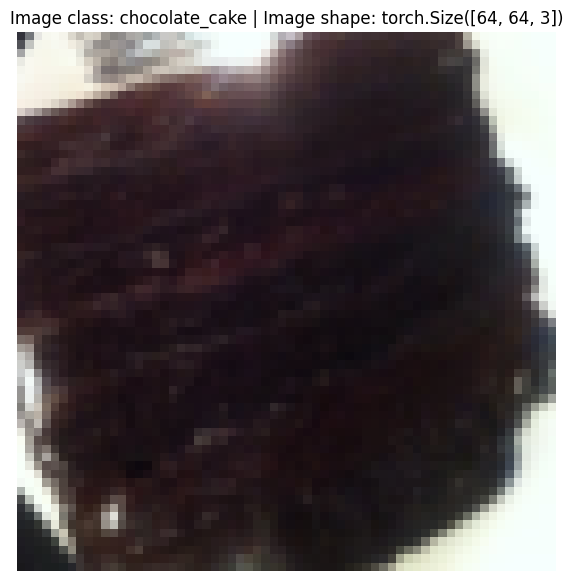

In [42]:
# For rearranging the order of dimensions
# In order to visualize image in a matplotlib, we have to rearrange dimensions by permuting it
# Pytorch prefers colour channels first as [C, H, W]
# MatPlotLib prefers colour channels last as [H, W, C]

img_permute = image.permute(1,2,0)

# Print out different shapes
print(f"Original image shape: {image.shape} -> [C, H, W]")
print(f"Image permuted shape: {img_permute.shape} -> [H, W, C]")

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"Image class: {class_names[label]} | Image shape: {img_permute.shape}")
plt.axis(False)

In [44]:
# Turn loaded images into dataloaders
# num_workers=1: Specifies the number of subprocesses to use for data loading.
# A higher number can speed up loading but might consume more memory.

from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False,
                                num_workers=NUM_WORKERS)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x789e6a064a50>,
 <torch.utils.data.dataloader.DataLoader at 0x789e6a064f50>)

In [45]:
# For getting batch image and label shape of train data loader
img_batch, label_batch = next(iter(train_dataloader))

len(img_batch), len(label_batch)

print(f"Image shape: {img_batch.shape} -> [Batch Size, Color Channels, Height, Width]")
print(f"Label shape: {label_batch.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [Batch Size, Color Channels, Height, Width]
Label shape: torch.Size([32])


In [48]:
# For getting batch image and label shape of test data loader
test_image_batch, test_label_batch = next(iter(test_dataloader))

len(test_image_batch), len(test_label_batch)

print(f"Image shape: {test_image_batch.shape} -> [Batch Size, Color Channels, Height, Width]")
print(f"Label shape: {test_label_batch.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [Batch Size, Color Channels, Height, Width]
Label shape: torch.Size([32])


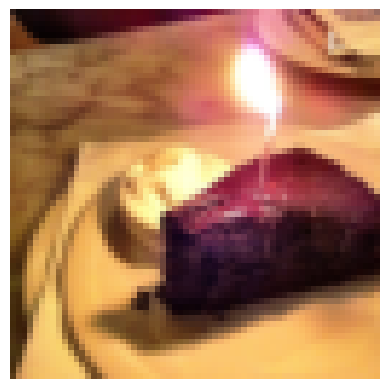

In [50]:
plt.imshow(img_batch[0].permute(1,2,0))
plt.axis(False)
plt.show()

In [51]:
from typing import List, Tuple, Dict

In [ ]:
# Display random images

def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None)